<a href="https://colab.research.google.com/github/jae-gyeong/marchine_learning_start/blob/master/19_09_30%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 랜덤 포레스트 분석
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [0]:
import pandas as pd


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
# 1. 데이터 필드
# ID : 집을 구분하는 번호
# date : 집을 구매한 날짜
# price : 집의 가격(Target variable)
# bedrooms : 침실의 수
# bathrooms : 화장실의 수
# sqft_living : 주거 공간의 평방 피트(면적)
# sqft_lot : 부지의 평방 피트(면적)
# floors : 집의 층 수
# waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
# view : 집이 얼마나 좋아 보이는지의 정도
# condition : 집의 전반적인 상태
# grade : King County grading 시스템 기준으로 매긴 집의 등급
# sqft_above : 지하실을 제외한 평방 피트(면적)
# sqft_basement : 지하실의 평방 피트(면적)
# yr_built : 지어진 년도
# yr_renovated : 집을 재건축한 년도
# zipcode : 우편번호
# lat : 위도
# long : 경도
# sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
# sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [6]:
train.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
train.shape

(15035, 21)

In [15]:
test.shape


(6468, 20)

In [17]:
X_all  = train.drop(['price'], axis =1) # 가격 버리기
y = train['price']
print(type(X_all), type(y), X_all.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> (15035, 20) (15035,)


In [18]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 20 columns):
id               15035 non-null int64
date             15035 non-null object
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 2.3+ MB


In [0]:
sel = ['bedrooms', 'bathrooms','sqft_living','sqft_lot']

X =X_all[sel]
y = train['price']

In [0]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
# 모델 만들기
# 모델 학습
# 모델 예측
# 모델 평가

In [39]:
# 한글 깨지지 않게 (그래프에)
# 콜랩에서 한글폰트 지정하려면 설치를 우선 해야하고 지정해야함 (오후에 pdf올려준다함)
# import matplotlib
# from matplotlib import font_manager, rc
# font_loc = "C:/Windows/Fonts/H2MJRE.TTF"
# font_name = font_manager.FontProperties(fname=font_loc).get_name()
# matplotlib.rc('font', family=font_name)

FileNotFoundError: ignored

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [28]:
forest = RandomForestRegressor(n_estimators=5, random_state=2) # 5개의 트리
forest.fit(X_train, y_train)
# bootstrap 샘플 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [29]:
# 학습된 랜덤포레스트의 트리
print(forest.estimators_)
print(forest.score)
print("\n\n{}".format(forest.base_estimator))
print("\n\n{}".format(forest.bootstrap))
print("\n\n{}".format(forest.criterion))
print("\n\n{}".format(forest.oob_score))

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1872583848, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=794921487, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_f

In [30]:
# 변수의 중요도
print(forest.feature_importances_)
# 4개변수에 대한 중요도 나옴

[0.03934276 0.07187087 0.6741707  0.21461568]


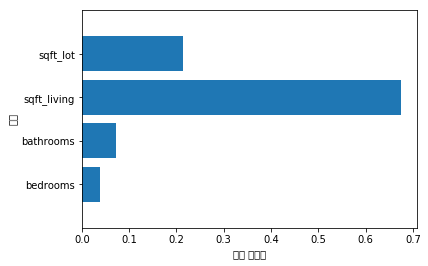

In [31]:
# 변수의 중요도 그래프 찍기
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model, dataset):
 n_features = dataset.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), dataset.columns)
 plt.xlabel("특성 중요도")
 plt.ylabel("특성")
 plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest, X)

In [60]:
#  실습 - 모델 50개의 나무 만들고 변수의 중요도 찍어보기
forest20 = RandomForestRegressor(n_estimators=20, random_state=2) # 5개의 트리
forest20.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [61]:
print(forest20.estimators_)

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1872583848, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=794921487, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_f

In [62]:
forest20.feature_importances_

array([0.03884123, 0.06916522, 0.67967055, 0.21232299])

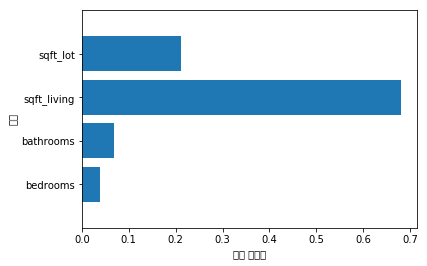

In [66]:
# 변수의 중요도 그래프 찍기

def plot_feature_importances_cancer(model, dataset):
 n_features = dataset.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), dataset.columns)
 plt.xlabel("특성 중요도")
 plt.ylabel("특성")
 plt.ylim(-1, n_features)

  
plot_feature_importances_cancer(forest20,X)

In [52]:
pred = forest.predict(X_test)
pred

array([325440. , 358224.5, 413615. , ..., 234197.5, 447750. , 444517.5])

In [53]:
pred = forest.predict(X_train); pred

array([ 444325. ,  334000. ,  326450. , ..., 1154070. ,  345540. ,
        490597.5])

In [54]:
result = forest.predict(test[sel]); result

array([ 562125. ,  472575. , 1386750. , ...,  480170. ,  372925. ,
        360347.5])

In [0]:

# 제출
import pandas
result_ = pd.DataFrame({'id': test['id'],'price': result})
result_.to_csv('result.csv', index = False)

In [69]:
# 모델에 대한 평가
cnt = 1
for model in forest20.estimators_:
    model.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.090
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.082
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.116
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.086
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.081
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.081
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.071
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.070
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.081
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.066
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.088
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.087
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.079
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.062
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.088
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.084
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.065
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.099
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.074
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.090


# Conclusion
(가) 회귀와 분류에 있어, 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.

(나) 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동한다.

(다) 만약 의사결정을 간소하게 해야 한다면 단일 트리를 사용할 수 있다.

(라) 랜덤 포레스트는 n_jobs를 이용하여 여러개의 코어를 이용하여 병렬 처리를 통해 속도 향상
을 시킬 수 있다.

(마) 랜덤 포레스트는 트리가 많을 수록 random_state 값의 변화에 따른 변동이 적다.

(바) n_estimators는 클수록 좋다. ( 더 많은 트리는 과대 적합을 줄여준다.) 다만, 시간과 메모
리의 문제가 발생

(사) max_features는 일반적으로 기본값을 쓰는 것이 좋다.

* 분류는 max_features=sqrt(n_features), 회귀는 max_features=n_features